**Regression**

In [21]:
import numpy as np

adv = np.array([3 , 5 , 7, 6 , 9, 12]).reshape(6,1)      #feature
sales = np.array([4, 7 , 8, 5, 12 , 13]).reshape(6,1)    #label

In [22]:
print(adv)

[[ 3]
 [ 5]
 [ 7]
 [ 6]
 [ 9]
 [12]]


In [23]:
print(sales)

[[ 4]
 [ 7]
 [ 8]
 [ 5]
 [12]
 [13]]


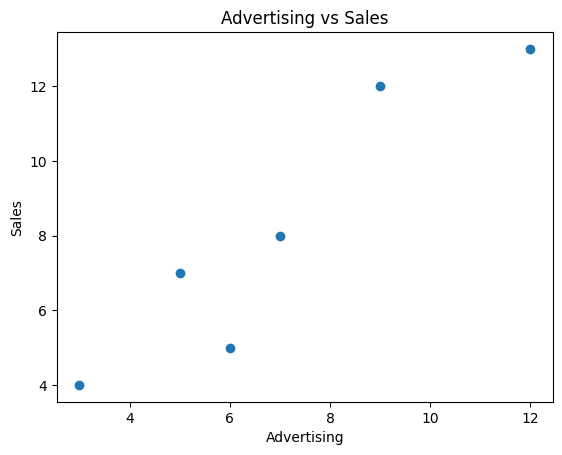

In [30]:
import matplotlib.pyplot as plt
plt.scatter(adv , sales)

plt.xlabel("Advertising")
plt.ylabel("Sales")
plt.title("Advertising vs Sales")

plt.show()

* Simple linear regression using ordinary least square
  * yh = mx + c

In [11]:
n1 = ((adv - np.mean(adv)) * (sales - np.mean(sales))).sum()
d1 = ((adv - np.mean(adv))**2).sum()
m = n1/d1
print(m)

print()

#c = y_mean - m * x_mean
c = np.mean(sales) - m*np.mean(adv)
print(c)

1.08

0.6066666666666656


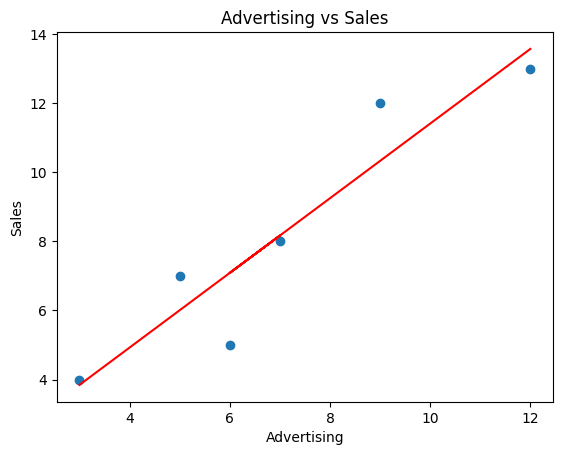

In [31]:
yh = m * adv + c   #linear realtion between adv and sales

plt.scatter(adv , sales)
plt.plot(adv , yh , c='red')

plt.xlabel("Advertising")
plt.ylabel("Sales")
plt.title("Advertising vs Sales")

plt.show()

In [15]:
#let consider advertisement cost = 56.7, then predict the sales value

predicted_sales = m * 56.7 + c
print(predicted_sales)

61.84266666666667


In [20]:
#Calculte possible errors

mae = abs(sales - yh).mean()
print("Mean absolute Error" , mae)

Mean absolute Error 0.9400000000000001


**Simple Linear Regression using Scikit-learn module**

In [25]:
adv = np.array([3 , 5 , 7, 6 , 9, 12]).reshape(6,1)
sales = np.array([4, 7 , 8, 5, 12 , 13]).reshape(6,1)

from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(adv,sales)      #features, labels

print(model.intercept_)
print(model.coef_)


[0.60666667]
[[1.08]]


In [26]:
pred_sales = model.predict(adv)
print(pred_sales)

[[ 3.84666667]
 [ 6.00666667]
 [ 8.16666667]
 [ 7.08666667]
 [10.32666667]
 [13.56666667]]


In [28]:
mae = abs(sales - pred_sales).mean()
print("mean_absolute_error" , mae)

mean_absolute_error 0.940000000000001


In [29]:
predicted_sales = model.predict([[56.7]])
print(predicted_sales)

[[61.84266667]]


**Regression Analysis on Advertisement Data**

In [33]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/bipulshahi/Dataset/main/Advertising.csv",
                 index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


* Given data has TV, Radio and newspaper advertisement expenses
* Sales value are also given for each set of advertisement expenses
* Build a predictive model to predict sales value if tv, radio & newspaper advertisment expenses are known.

In [34]:
df.shape

(200, 4)

In [46]:
#Define features and labels
X = df[['TV']]       #features
y = df['sales']      #label

In [47]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=42)

from sklearn.linear_model import LinearRegression
model1 = LinearRegression()

model1.fit(xtrain,ytrain)                         #features, labels, we train predictive model using only 80% of toatl data

print(model1.intercept_)
print(model1.coef_)

7.119638430592953
[0.04652973]


In [48]:
Ytrainpred = model1.predict(xtrain)
Ytestpred = model1.predict(xtest)

In [49]:
adv_tv = 89.5

salesP = model1.predict([[adv_tv]])
print(salesP)

print(model1.intercept_ + model1.coef_ * adv_tv)

[11.2840496]
[11.2840496]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [50]:
maeTrain = abs(ytrain - Ytrainpred).mean()
maeTest = abs(ytest - Ytestpred).mean()

print("Mean Absolute Error, Train Data" , maeTrain)
print("Mean Absolute Error, Test Data" , maeTest)

Mean Absolute Error, Train Data 2.58308426066599
Mean Absolute Error, Test Data 2.444420003751042


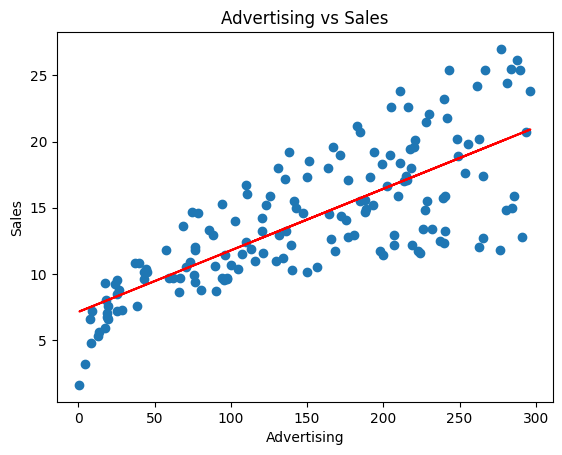

In [51]:
plt.scatter(xtrain,ytrain)

plt.plot(xtrain,Ytrainpred,'r')

plt.xlabel('Advertising')
plt.ylabel('Sales')
plt.title('Advertising vs Sales')

plt.show()